# EDA of Audio Features

### Liam Kelly


In [1]:
# Import packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Importing Data and Initial Inspection

In [2]:
# User Inputs
input_name = "csv_files/audio_comp_df.csv"
target_name = "csv_files/model_comp_df.csv"

In [3]:
# Import data and print first 5 rows:
df = pd.read_csv(input_name)
print(df.shape)
df.head()

(30956, 15)


,id,word,data_len,sampling_rate,temporal_bandwidth,temporal_skewness,temporal_kurtosis,temporal_irregularity,spectral_centroid,spectral_bandwidth,spectral_skewness,spectral_kurtosis,spectral_flatness,spectral_irregularity,spectral_rolloff
0,00176480_nohash_0,down,16000.0,16000.0,0.092533,0.803511,4.268702,0.159154,1128.828281,563.817150,0.235713,2.366724,-7.751194,0.010792,1659.836643
1,004ae714_nohash_0,down,16000.0,16000.0,0.138942,-0.883279,6.286660,0.641607,1812.621718,410.098678,-1.642777,6.356789,-6.847276,0.075192,2133.526166
2,00b01445_nohash_0,down,16000.0,16000.0,0.134255,-0.304882,4.270590,0.193219,1198.975869,467.127575,0.538033,3.283999,-8.409207,0.099058,1568.767314
3,00b01445_nohash_1,down,16000.0,16000.0,0.130594,0.301250,2.955263,0.274938,1334.102695,461.832080,0.139646,2.963423,-8.171098,0.072307,1736.532500
4,00f0204f_nohash_0,down,16000.0,16000.0,0.212064,0.691076,2.468556,0.085359,1024.409352,590.452277,0.588880,2.546914,-7.479742,0.087896,1567.566041


Null and inf values:

In [4]:
df.isna().sum() # check all columns for nan values

id                       0
word                     0
data_len                 0
sampling_rate            0
temporal_bandwidth       0
temporal_skewness        0
temporal_kurtosis        0
temporal_irregularity    0
spectral_centroid        0
spectral_bandwidth       0
spectral_skewness        0
spectral_kurtosis        0
spectral_flatness        0
spectral_irregularity    0
spectral_rolloff         0
dtype: int64

In [5]:
col_inf = [] # create list to store columns with inf values

# Loop over each column to check for inf values:
for col in df.select_dtypes('number').columns:
    print(col, np.isinf(df[col]).sum())
    if np.isinf(df[col]).sum() > 0 :
        col_inf.append(col)

data_len 0
sampling_rate 0
temporal_bandwidth 0
temporal_skewness 0
temporal_kurtosis 0
temporal_irregularity 0
spectral_centroid 0
spectral_bandwidth 0
spectral_skewness 0
spectral_kurtosis 0
spectral_flatness 0
spectral_irregularity 0
spectral_rolloff 0


Text(0.5, 1.0, 'Soken Word Distribution')

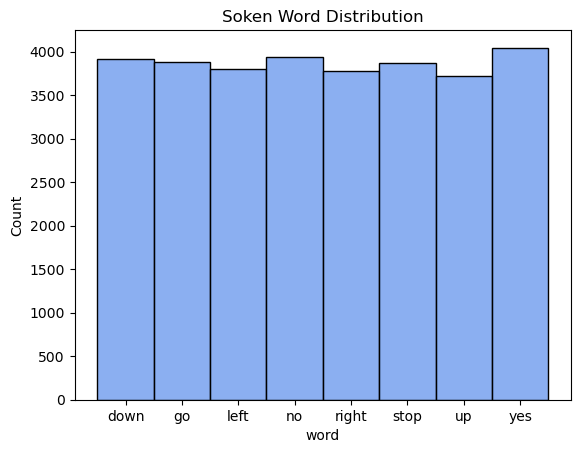

In [6]:
sns.histplot(df['word'], color = 'cornflowerblue')
plt.ylabel('Count')
plt.title('Soken Word Distribution')

Let's use down sampling to create an even distribution in the different word labels.

First we must determine what is the size of the smallest group. We can use groupby to accomplish this:

In [7]:
min_samp = df.groupby('word').count()['data_len'].min()
print('The smallest number of samples for a word is %i' % min_samp)

The smallest number of samples for a word is 3723


Since the smallest number of samples for one word is 3723, we should reduce the number of samples for each of the other words to this same length.

In [8]:
df_clean = pd.DataFrame()
for word in df.word.unique():
    df_word = df[df['word'] == word].sample(min_samp)
    df_clean = pd.concat([df_clean, df_word], axis = 0)

Text(0.5, 1.0, 'Soken Word Distribution')

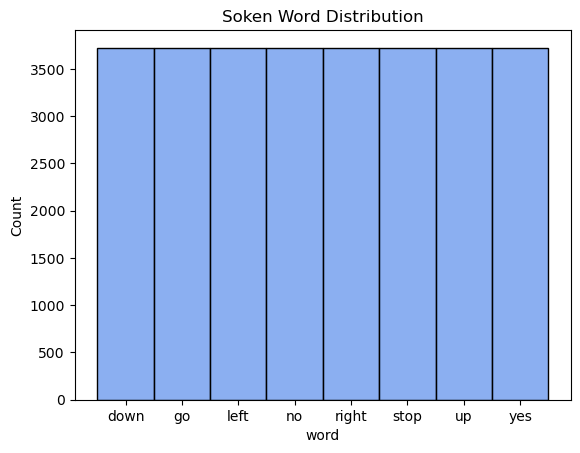

In [9]:
sns.histplot(df_clean['word'], color = 'cornflowerblue')
plt.ylabel('Count')
plt.title('Soken Word Distribution')

## 2. Feature Transformation

Machine learning classfication models are often built on the assumption that the input data's distribution for each of it's features is a normal distribution. 

To help our data satisfy this assumption, various mathematical operations can be applied to the data to make it's distribution more normal: e.g. by taking the log, square-root, inverse of the data, or by raising the data to a power. 

Each of these operations were applied to the data for each feature, and, in cases where the operation improved the normality of the data, the transformed data was chosen to replace the original data in the output dataframe.

In [10]:
# Create a copy of the dataframe to store the transformed features:
df_clean = df.copy()

### 2.1 Temporal Bandwidth

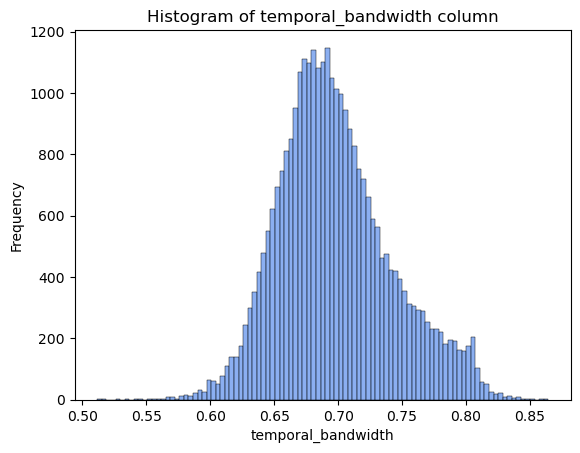

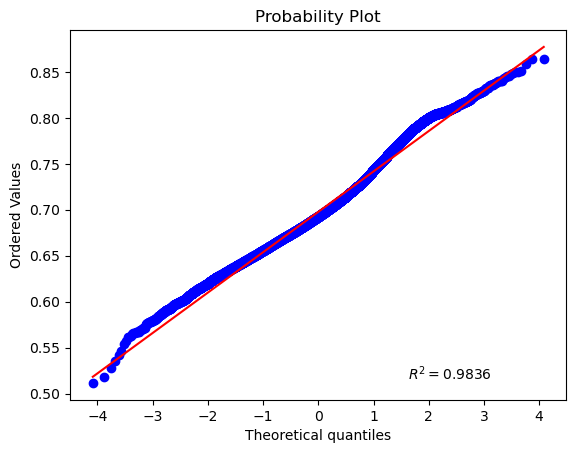

In [11]:
# Plot a histogram of the transformed data:
sns.histplot(np.power(df_clean['temporal_bandwidth'],1/6), color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('temporal_bandwidth')
plt.title('Histogram of temporal_bandwidth column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(np.power(df_clean['temporal_bandwidth'],1/6) ,dist="norm", plot = plt,  rvalue=True)
plt.show()

### 2.2 Temporal Skewness

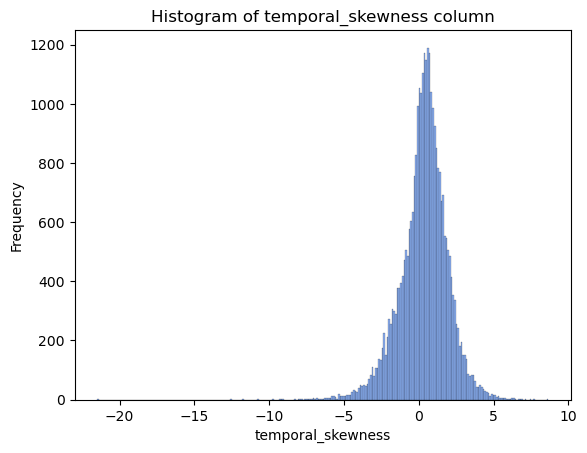

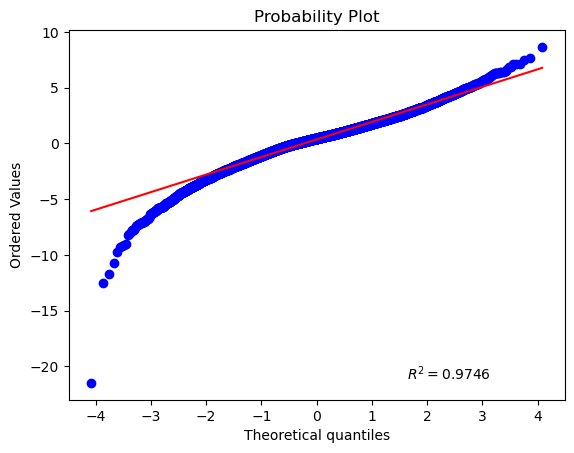

In [12]:
# Plot a histogram of the transformed data:
sns.histplot(df_clean['temporal_skewness'], color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('temporal_skewness')
plt.title('Histogram of temporal_skewness column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(df_clean['temporal_skewness'],dist="norm", plot = plt,  rvalue=True)
plt.show()

### 2.3 Temporal Kurtosis

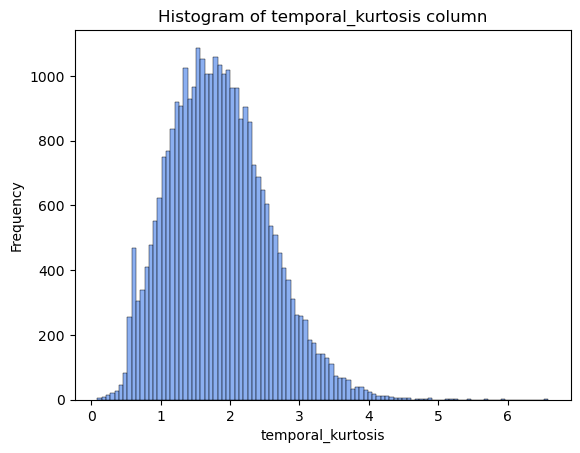

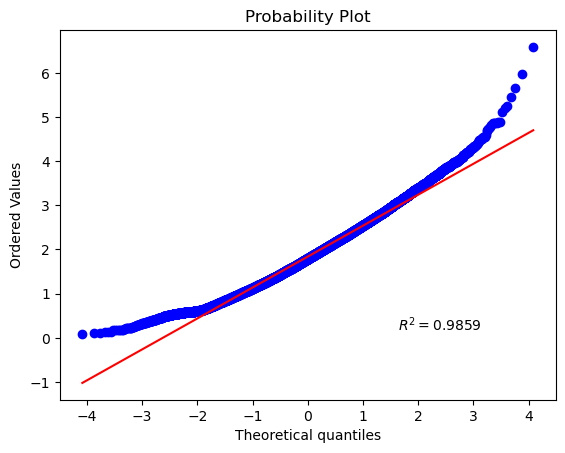

In [13]:
# Plot a histogram of the transformed data:
sns.histplot(np.log(df_clean['temporal_kurtosis']), color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('temporal_kurtosis')
plt.title('Histogram of temporal_kurtosis column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(np.log(df_clean['temporal_kurtosis']) ,dist="norm", plot = plt,  rvalue=True)
plt.show()

### 2.4 Temporal Irregularity

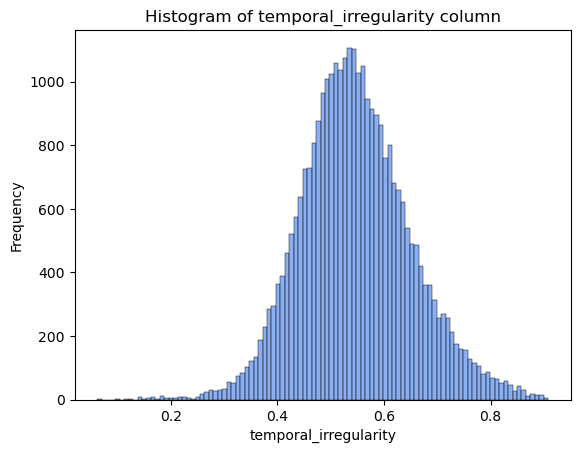

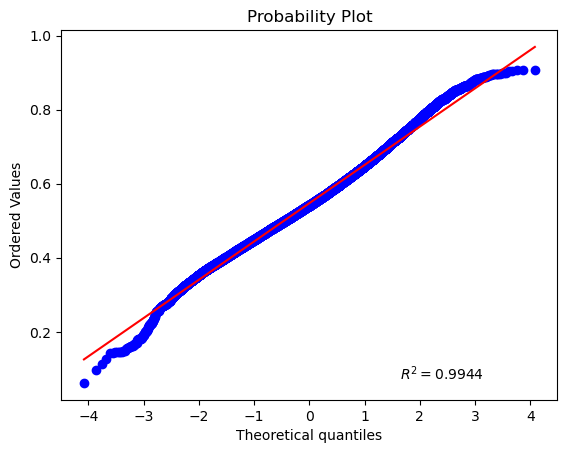

In [14]:
# Plot a histogram of the transformed data:
sns.histplot(np.power(df_clean['temporal_irregularity'],1/4), color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('temporal_irregularity')
plt.title('Histogram of temporal_irregularity column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(np.power(df_clean['temporal_irregularity'],1/4) ,dist="norm", plot = plt,  rvalue=True)
plt.show()

### 2.5 Spectral Centroid

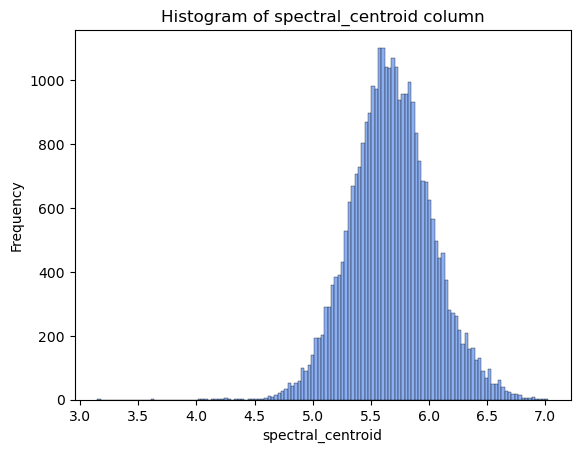

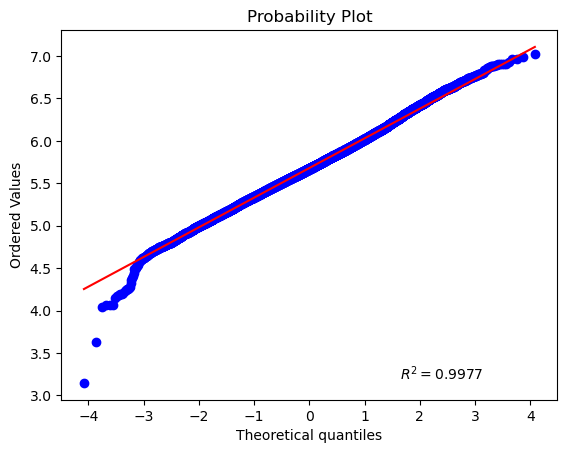

In [15]:
# Plot a histogram of the transformed data:
sns.histplot(np.power(abs(df_clean['spectral_centroid']),1/4), color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('spectral_centroid')
plt.title('Histogram of spectral_centroid column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(np.power(abs(df_clean['spectral_centroid']),1/4) ,dist="norm", plot = plt,  rvalue=True)
plt.show()

### 2.6 Spectral Bandwidth

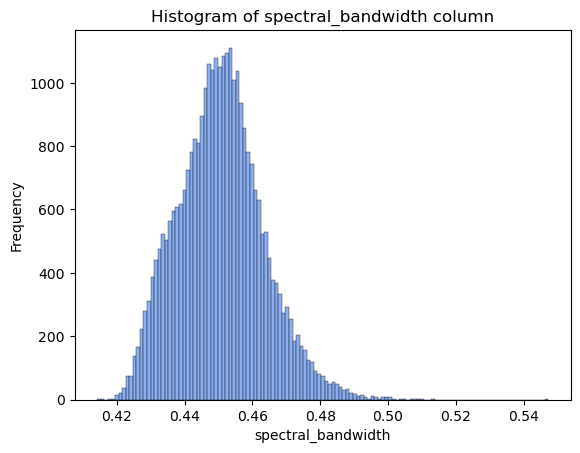

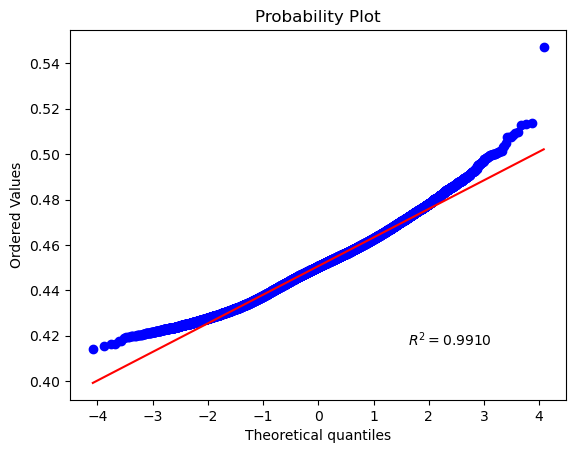

In [16]:
# Plot a histogram of the transformed data:
plt.figure()
sns.histplot(np.power(np.reciprocal(df_clean['spectral_bandwidth']),1/8), color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('spectral_bandwidth')
plt.title('Histogram of spectral_bandwidth column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(np.power(np.reciprocal(df_clean['spectral_bandwidth']), 1/8) ,dist="norm", plot = plt,  rvalue=True)
plt.show()

### 2.7 Spectral Skewness

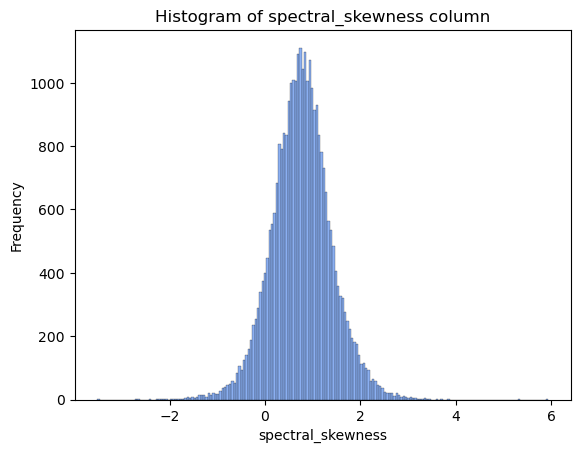

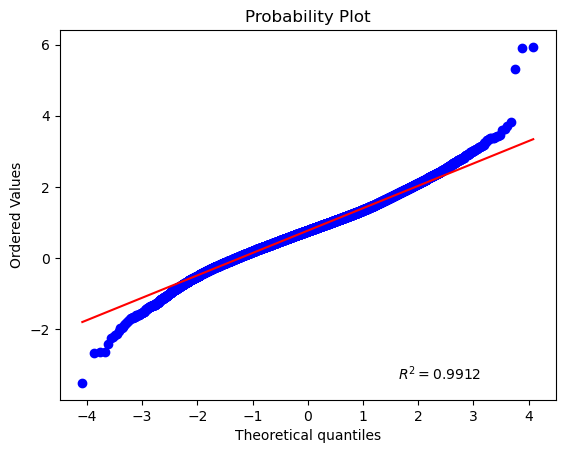

In [17]:
# Plot a histogram of the transformed data:
sns.histplot(df_clean['spectral_skewness'], color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('spectral_skewness')
plt.title('Histogram of spectral_skewness column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(df_clean['spectral_skewness'] ,dist="norm", plot = plt,  rvalue=True)
plt.show()

### 2.8 Spectral Kurtosis

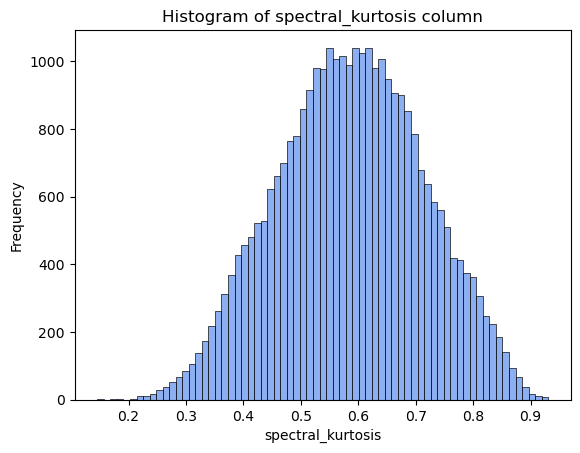

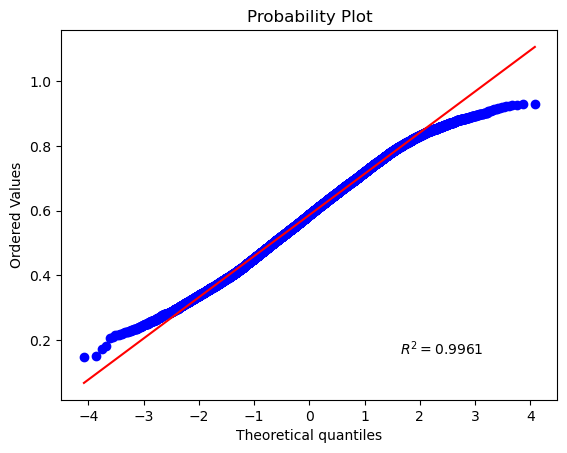

In [18]:
# Plot a histogram of the transformed data:
sns.histplot(np.power(np.reciprocal(df_clean['spectral_kurtosis']),1/2), color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('spectral_kurtosis')
plt.title('Histogram of spectral_kurtosis column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(np.power(np.reciprocal(df_clean['spectral_kurtosis']),1/2) ,dist="norm", plot = plt,  rvalue=True)
plt.show()

### 2.9 Spectral Flatness

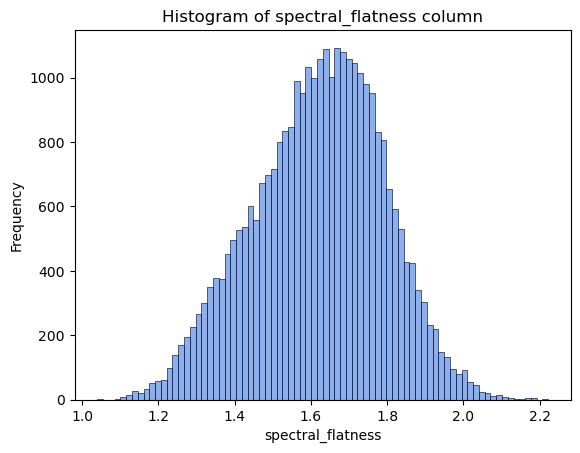

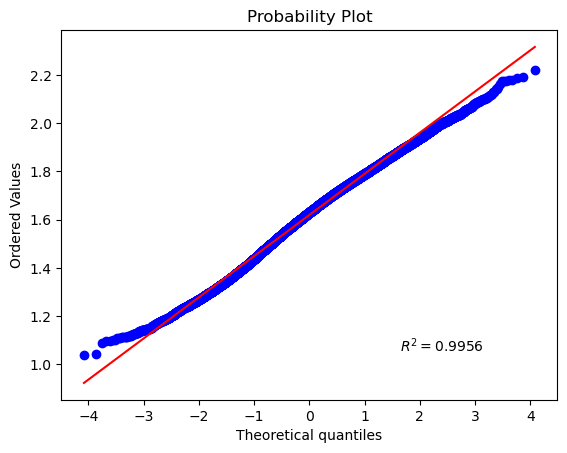

In [19]:
# Plot a histogram of the transformed data:
sns.histplot(np.power(abs(df_clean['spectral_flatness']),1/4), color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('spectral_flatness')
plt.title('Histogram of spectral_flatness column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(np.power(abs(df_clean['spectral_flatness']),1/4) ,dist="norm", plot = plt,  rvalue=True)
plt.show()

### 2.10 Spectral Irregularity

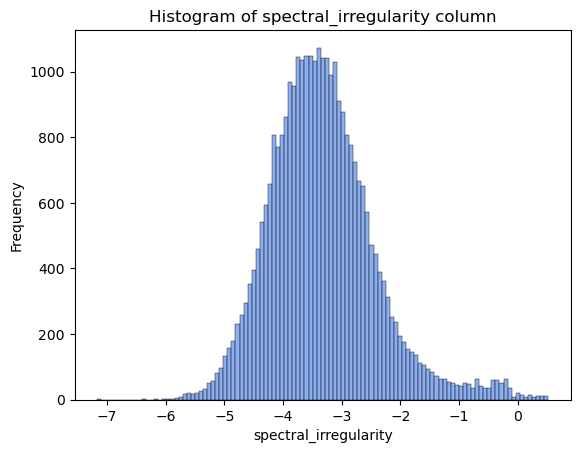

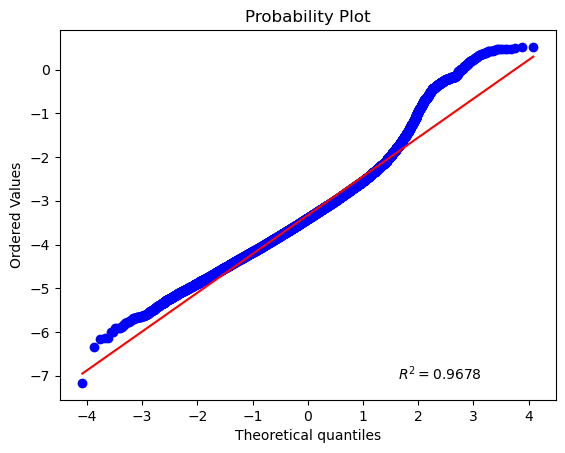

In [20]:
# Plot a histogram of the transformed data:
sns.histplot(np.log(df_clean['spectral_irregularity']), color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('spectral_irregularity')
plt.title('Histogram of spectral_irregularity column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(np.log(df_clean['spectral_irregularity']) ,dist="norm", plot = plt,  rvalue=True)
plt.show()

### 2.11 Spectral Rolloff*

****Couldn't find a transformation to improve the normality of this feature***

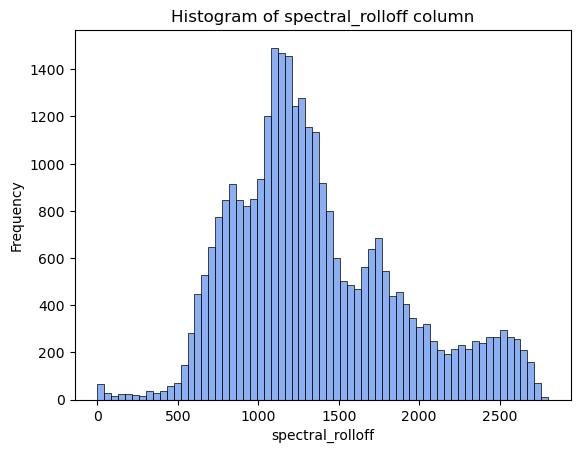

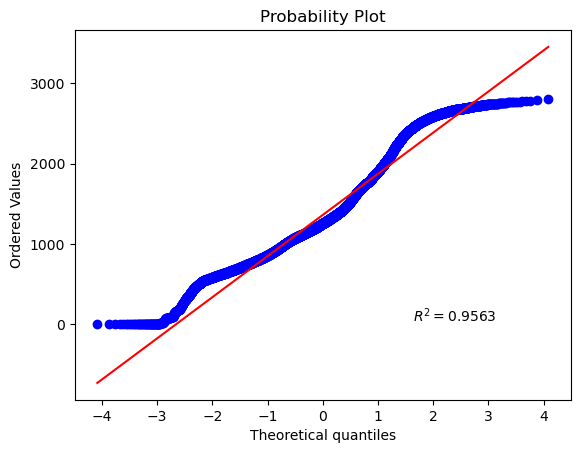

In [21]:
# Plot a histogram of the transformed data:
sns.histplot(df_clean['spectral_rolloff'], color = 'cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('spectral_rolloff')
plt.title('Histogram of spectral_rolloff column')
plt.show()

# Plot a Q-Q plot:
stats.probplot(df_clean['spectral_rolloff'],dist="norm", plot = plt,  rvalue=True)
plt.show()

The transformed features (using the mathematical transformation which yielded the best $R^{2}$ value from the Q-Q plot) can be stored in the df_clean dataframe. Features prior to transofrmation are overwritten. 

In [22]:
df_clean['temporal_bandwidth'] = np.power(df_clean['temporal_bandwidth'],1/6)
df_clean['temporal_kurtosis'] = np.log(df_clean['temporal_kurtosis'])
df_clean['temporal_irregularity'] = np.power(df_clean['temporal_irregularity'],1/4)
df_clean['spectral_centroid'] = np.power(abs(df_clean['spectral_centroid']),1/4)
df_clean['spectral_bandwidth'] = np.power(np.reciprocal(df_clean['spectral_bandwidth']),1/8)
df_clean['spectral_kurtosis'] = np.power(np.reciprocal(df_clean['spectral_kurtosis']),1/2)
df_clean['spectral_flatness'] = np.power(abs(df_clean['spectral_flatness']),1/4)
df_clean['spectral_irregularity'] = np.log(df_clean['spectral_irregularity'])

## 3. Interlabel Variance

In order for classification models to be able to predict spoken word from the calculated audio features, there must be variance between the different word labels in the features. We can first visualize the distribution along each feature for the different labels to see if the means for each label have any difference. We can then perfrom an ANOVA test to see if there is a statistically significant difference between the means of the spoken words for each of the audio features.

### 3.1 Box Plot Visualization

Box plots can help visualize the distribution of data along a given feature. We can visualize the box plots for each spoken word along each feature to see if any features provide significant differences in the distributions of spoken words.

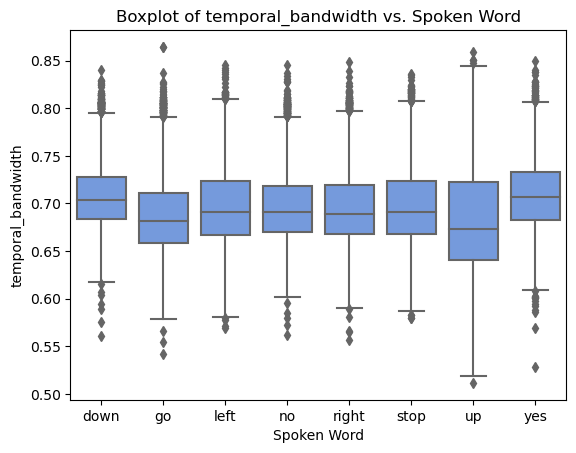

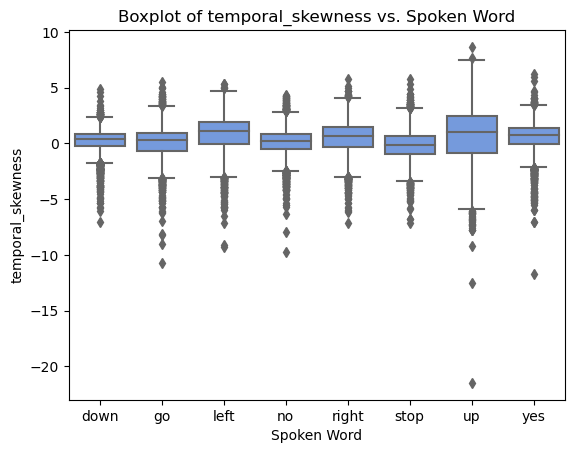

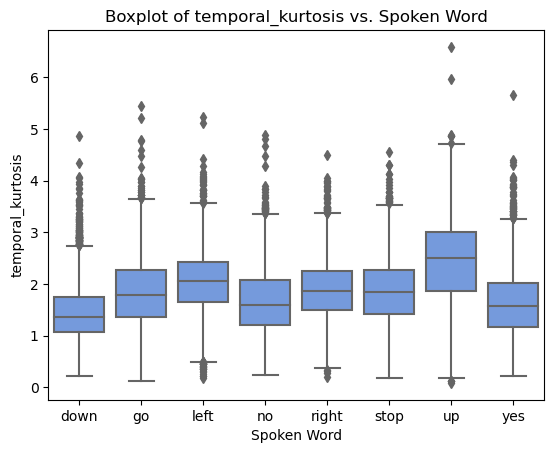

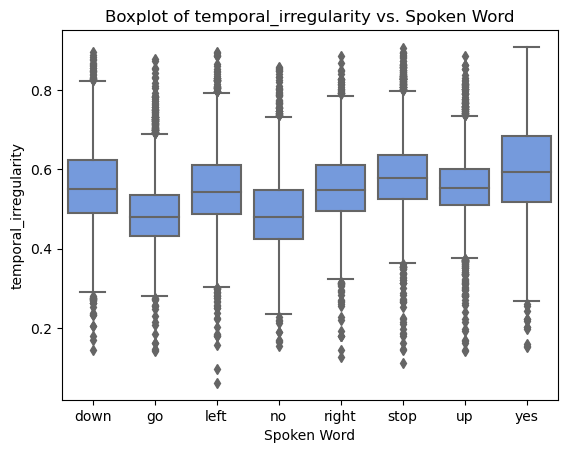

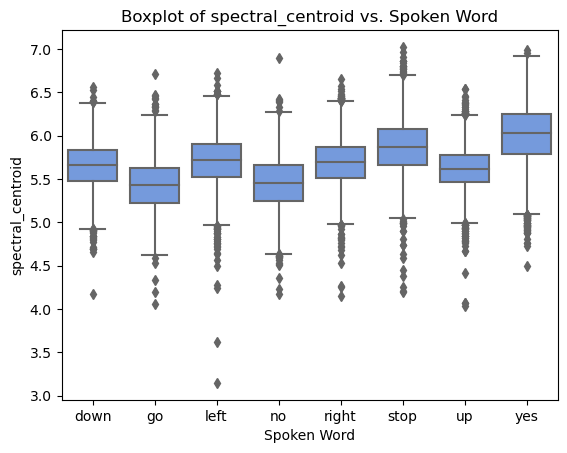

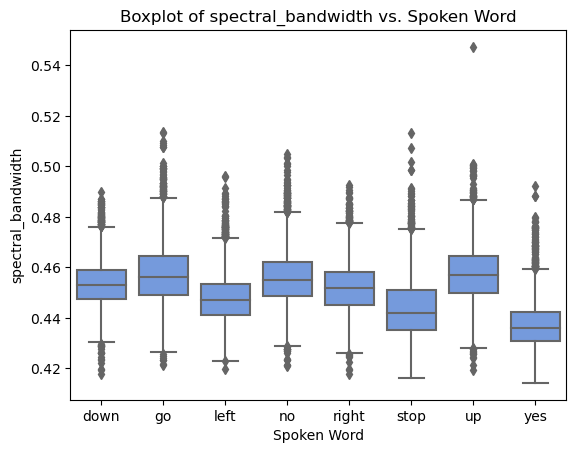

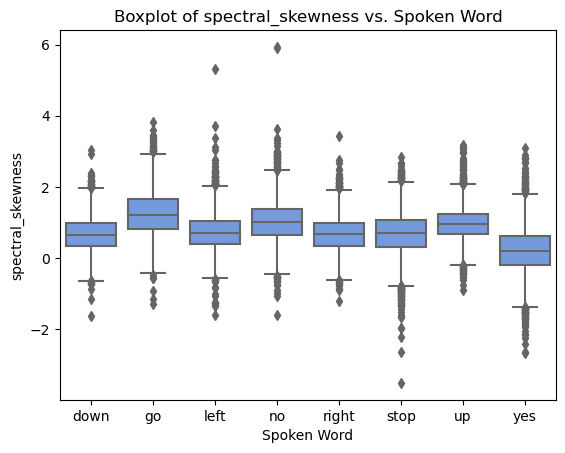

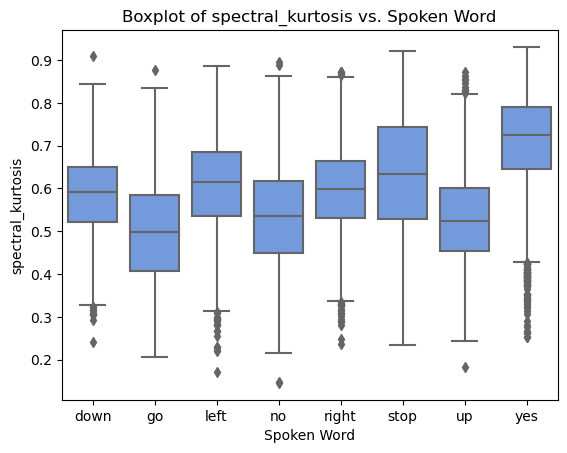

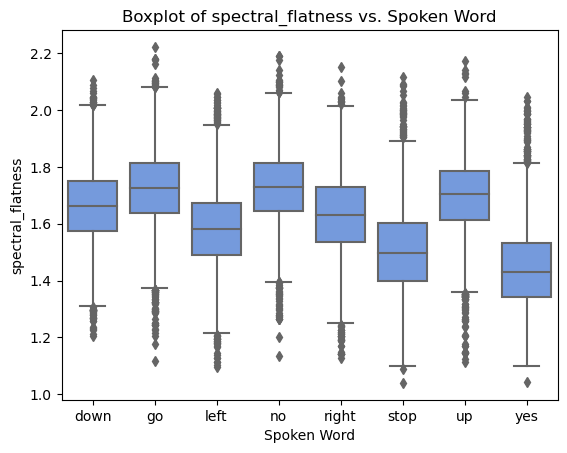

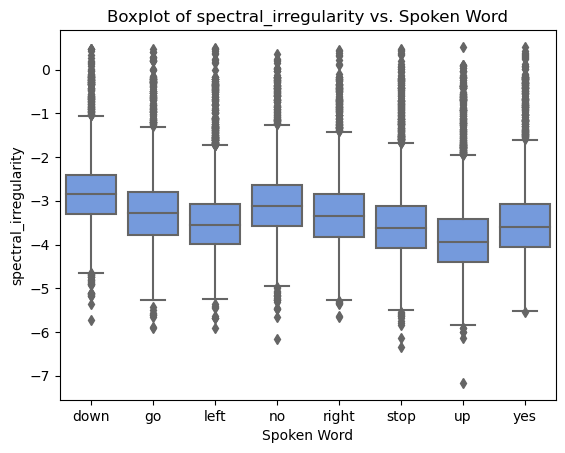

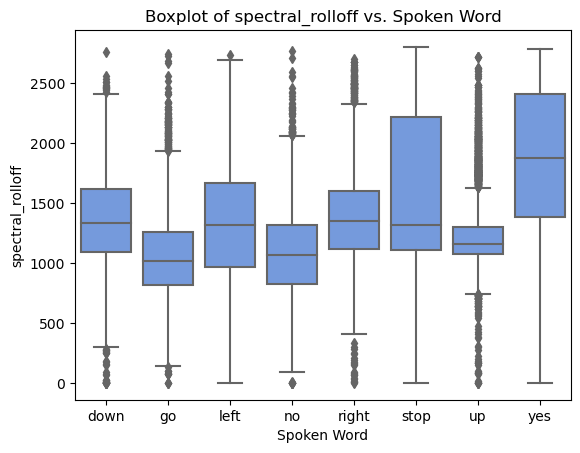

In [23]:
# Iterate over each feature column and plot a boxplot for each:
for col in df_clean.select_dtypes('number').columns[2:]:
    
    sns.boxplot(x = df_clean['word'], y = df_clean[col], color = 'cornflowerblue')
    plt.ylabel(col)
    plt.xlabel('Spoken Word')
    plt.title('Boxplot of %s vs. Spoken Word' % col)
    plt.show()

From aboce, there are various features that do a good job of spearating thte distributions of the different spoken words. This should allow a classification model to distinguish between words based off their values for each feature.

### 3.2 ANOVA Testing

ANOVA testing can be carried out to determine if there exists a statistically significant difference between in the means of the spoken words for each of the audio features. The problem can be described using the following null and alternative hypotheses:

For an audio feature $ X $ and spoken words $ y_{i} $ ( $ i $ in range of 1 -> k, where k is the number of distinct words):

$ H_{0} $: The mean value of $ X $  is equal for all $ y $ ( $ mean(X(y_0)) = mean(X(y_1)) = mean(X(y_2)) = ... = mean(X(y_k)) $ )

$ H_{1} $: The mean value of $ X $ is not equal for all $ y $.

This test will tell us if the data for each group has benn drawn from the same distribution, and will help us determine if the audio feature is useful in distinguishing between the different spoken words.

In [24]:
spoken_words = df_clean.word.unique()

for col in df_clean.select_dtypes('number').columns[2:]:
    anova_data = []
    for word in spoken_words:
        anova_data.append(df_clean.loc[df_clean["word"] == word, col])
        
    anova_result = stats.f_oneway(anova_data[0], anova_data[1], anova_data[2], anova_data[3], anova_data[4], anova_data[5], anova_data[6], anova_data[7] )
    print('For \033[1m%s\033[0m, the probability of the null hypothesis is: \033[1m%s\033[0m' % (col, anova_result[1]))

For temporal_bandwidth, the probability of the null hypothesis is: 4.0342897480911486e-234
For temporal_skewness, the probability of the null hypothesis is: 7.174859390156361e-256
For temporal_kurtosis, the probability of the null hypothesis is: 0.0
For temporal_irregularity, the probability of the null hypothesis is: 0.0
For spectral_centroid, the probability of the null hypothesis is: 0.0
For spectral_bandwidth, the probability of the null hypothesis is: 0.0
For spectral_skewness, the probability of the null hypothesis is: 0.0
For spectral_kurtosis, the probability of the null hypothesis is: 0.0
For spectral_flatness, the probability of the null hypothesis is: 0.0
For spectral_irregularity, the probability of the null hypothesis is: 0.0
For spectral_rolloff, the probability of the null hypothesis is: 0.0


From the above result, the probability for the null hypothesis for each audio feature is << 0.05, thus we can reject the null hypothesis and concluded that each spoken word has not been sampled from the same distributions.

## 4. Feature Multicollinearity

Finally, the correlation between features can be calculated to check for multicollinearity. Multicollinearity occurs when severeal feautures are correlated. Many classification models are built on the assumption that features are independent, and when features are correlated, the coefficient values produced from the model can become unreliable.

<AxesSubplot:>

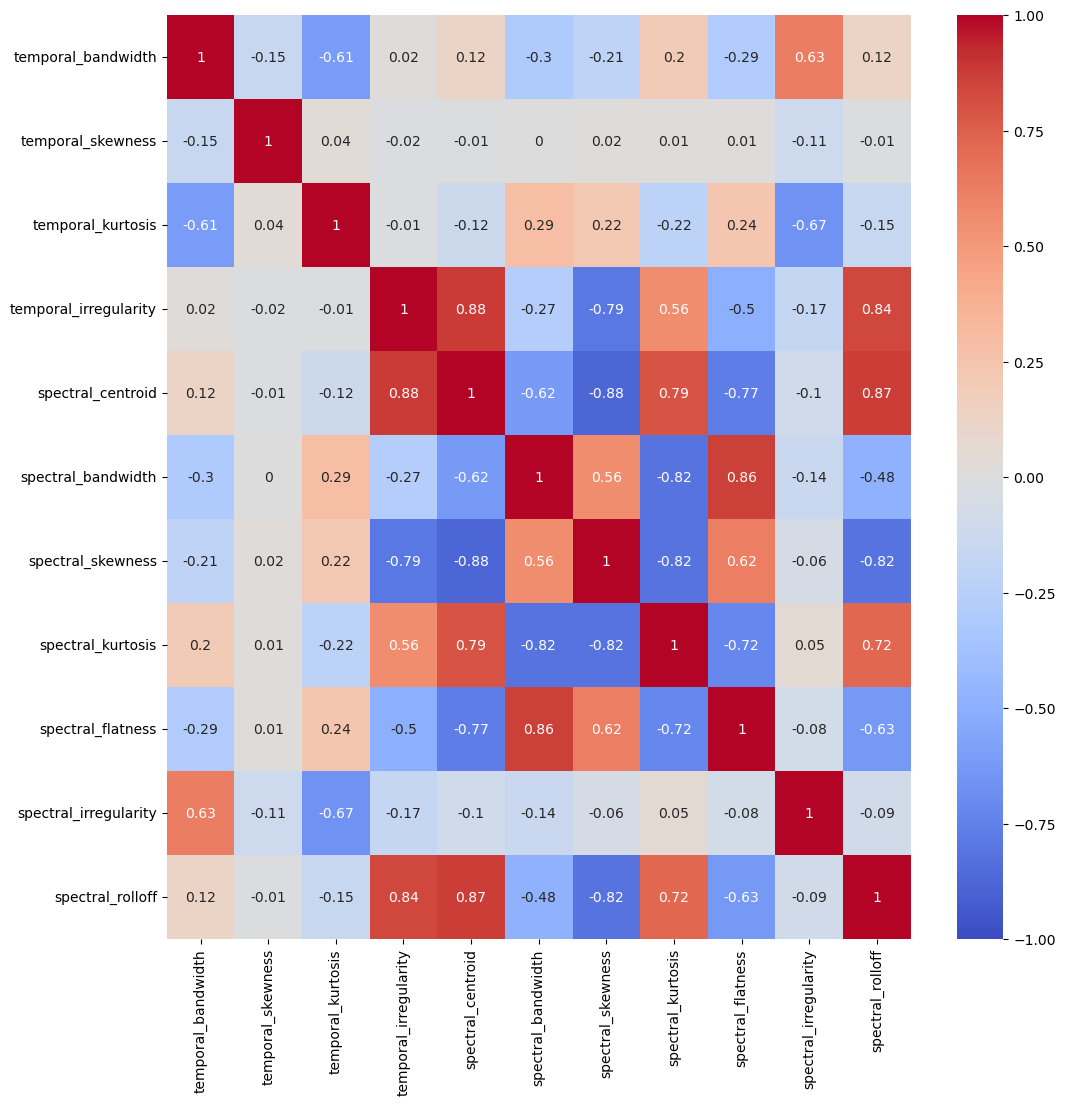

In [25]:
# Plot a heatmap of the correlation between each feature.
plt.figure(figsize = [12,12])
sns.heatmap(df_clean.drop(columns = ['data_len','sampling_rate']).corr().round(2), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)

There is ***significant*** correation between the features in the dataset. Thus, it is not advisable to use a regression basded model (Logistic/Linear Regression model) for future analysis.

## 5. Save Dataframe for Modelling

Save the cleaned dataframe to a csv file for use in the next notebook.

In [26]:
df_clean.to_csv(target_name, index = False)